# Digit Recognizer

## PLAN

For this project, we can follow the following process:

#### 1. **Set Up**
- **Install and import package**: We will use TensorFlow for this project.
   
#### 2. **Data Exploration and Preprocessing**
- **Load the Data**: The dataset includes grayscale images of handwritten digits (0-9).
- **Visualize Samples**: Check samples to understand the dataset's structure.
- **Split Dataset**: Split dataset to train, val, and test set. 
- **Normalize the Data**: Convert pixel values from 0-255 to a range of 0-1, which helps speed up the training.
- **Reshape the Data**: The images are 28x28 pixels. We need to reshape it to (28, 28, 1), where 1 indicates grayscale.

#### 3. **Build CNN Model**
Start with a simple one. We can use:
- **Convolutional Layers**: Detect features in the image.
- **Pooling Layers**: Downsample to reduce computational complexity.
- **Flatten Layer**: Transform the 2D feature maps into 1D for the fully connected layer.
- **Fully Connected (Dense) Layers**: Enable final classification.
- Use ReLU activations for hidden layers and softmax for the output layer to get probabilities for each digit (0-9).

#### 4. **Compile and Train the Model**
- **Choose an optimizer**:  Adam.
- **Fit the Model**: Run the model on the training set.
- Monitor the training and validation accuracy and loss to check for overfitting.

#### 7. **Make Predictions and Submit**
- Once the prediction is made, save it to a csv file.

## ANALYZE

### 1. Set up

In [11]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

### 2. Data Exploration and Preprocessing

**Load Dataset**

In [12]:
# Load dataset
df = pd.read_csv("train.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Visualize Samples**

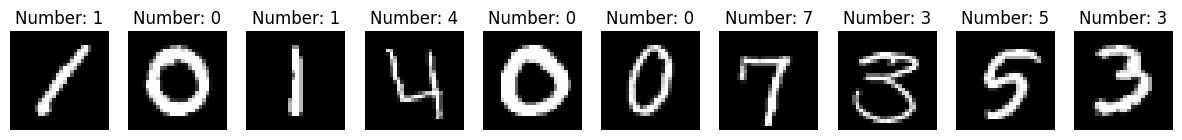

In [13]:
# Visualize the first 10 samples
plt.figure(figsize=(15, 7))

for i in range(10):
    image = df.iloc[i, 1:].values.reshape(28, 28)
    label = df.iloc[i, 0]
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Number: {label}")
    plt.axis("off")

plt.show()


**Split Dataset**

In [14]:
x = df.drop("label", axis=1).values
y = df["label"].values

# Split dataset
x_temp, x_test, y_temp, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_temp, y_temp, test_size=0.1111, random_state=42)  # 0.1111 * 0.9 ≈ 0.1

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(33600, 784) (33600,)
(4200, 784) (4200,)
(4200, 784) (4200,)


**Normalize the Images**

In [15]:
# Normalize the Images
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

print(x_train.shape, y_train.shape)
# output mean, x: 42000 images, each image has 784 pixels, y: 42000 labels

(33600, 784) (33600,)


**Reshape the Data**

In [16]:
# Reshape the Data (28, 28, 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# -1 means that the total value will remain the same, in this case 42000

## CONSTRUCT

### 3. Build CNN Model

For this model, we will have Convolutional layers -> MaxPooling layers -> Flatten layer -> Dense layer -> Output layer. Convolutional layers and MaxPooling layers are repeatable. 

Input shape is **(28, 28, 1)**

First Convolutional layers:
- Use a 3 x 3 filter, a total of 32. Make it 3 x 3 x32
- Activation is RELU
- Input shape is 28 x 28 x 1 (Unlike the color image, this is a grayscale image, so only 1 color channel)
- The output shape of this layer is **(26, 26, 32)**

First MaxPooling layers:
- A size of 2 x 2
- The output shape of this layer is **(13, 13, 32)**

Second Convolutional layers:
- Use a 3 x 3 filter; increase to 64. Make it 3 x 3 x64
- Activation is RELU
- The output shape of this layer is **(11, 11, 64)**

Second MaxPooling layers:
- A size of 2 x 2
- The output shape of this layer is **(5, 5, 64)**

Flatten layer
- Make data to 1D
- The output shape of this layer is  **(1600)**

First Fully Connected layer:
- Include 128 neurons; Activation is RELU
- The output shape of this layer is **(128)**

Second Fully Connected layer:
- Output 10 category, Activation is softmax
- The output shape of this layer is **(10)**

Output shape is **(10)**

We can also check it by using `summary()` function.

In [17]:
# Build the Model
# Convolutional layers -> MaxPooling layers -> Flatten layer -> Dense layer -> Output layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 4. Compile and Train the Model

In [18]:
# Compile the Model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the Model
model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val))

Epoch 1/30


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8806 - loss: 0.3831 - val_accuracy: 0.9788 - val_loss: 0.0598
Epoch 2/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9871 - val_loss: 0.0432
Epoch 3/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9871 - val_loss: 0.0408
Epoch 4/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.9883 - val_loss: 0.0390
Epoch 5/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9950 - loss: 0.0168 - val_accuracy: 0.9890 - val_loss: 0.0392
Epoch 6/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9893 - val_loss: 0.0346
Epoch 7/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9960 - loss: 0.0124 - val_accuracy: 0.9890 - val_loss: 0.0406
Epoch 8/30
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9977 - loss: 0.0083 - val_accu

## 5. Make Predictions

875/875 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


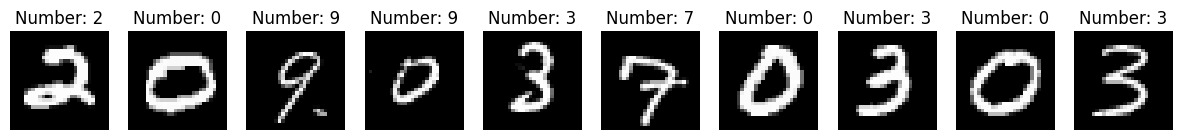

In [19]:
# Make Predictions
test = pd.read_csv("test.csv")
test = test.values / 255.0
test = test.reshape(-1, 28, 28, 1)

predictions = model.predict(test)
predictions = np.argmax(predictions, axis=1)

# Visualize the first 10 samples
plt.figure(figsize=(15, 7))

for i in range(10):
    image = test[i].reshape(28, 28)
    label = predictions[i]
    plt.subplot(1, 10, i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Number: {label}")
    plt.axis("off")
    
plt.show()

In [20]:
# Save the Predictions
# As format: ImageId,Label
predictions = pd.DataFrame(predictions, columns=["Label"])
predictions.index += 1
predictions.index.name = "ImageId"
predictions.to_csv("predictions.csv")